# Statistics in Python

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# for power test
from statsmodels.stats.power import TTestIndPower, TTestPower

# for ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols


%matplotlib inline

*A successful experiment doesn't prove a relationship between a dependent and independent variable, it just proves that there is not enough evidence to believe there is no relationship.*

## (Student's) t-test

Used since we don't know the population distribution (so don't have population standard deviation)

Similar to normal curve, but drops off less quickly at the tails (less certain that the mean is the "actual" mean.)

**One-sample t-test** compares the mean of the sample to a known value.

**Two-sample t-test** assumes samples are of equal size and equal variance.

**Steps**

1 - Establish H0 and H1

2 - Choose significance level alpha

3 - Calculate test statistic

4 - Determine t-critical value

5 - Compare results

If t-statistic is greater than t-critical and p-value is less than alpha, we reject H0 in favour of H1 and conclude that the results are statistically significant. Otherwise we cannot reject H0.

### Python code

`scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')`

This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

`scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')`

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default

*Returns*

statistic (float or array): the calculated t-statistic

pvalue (float or array): the two-tailed p-value

### Examples

In [61]:
# One-sample t-test

sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1,78.7, 73.5,
                   86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

# Provided popmean and alpha
mu = 65
alpha = 0.05

# t-critical
t_crit = stats.t.ppf(1-alpha, df = len(sample)-1)
print(f't-critical: {round(t_crit,3)}')

# One sample t-test, comparing to popmean
t_value, p_value = stats.ttest_1samp(a = sample, popmean = mu )
print(f't-statistic: {round(t_value,3)}, p-value: {round(p_value,6)}')

# Compare and print result
if (t_value>t_crit) and (p_value < alpha):
    print(f"Reject Null Hypothesis. Results are statistically significant")
else:
    print("Cannot reject Null Hypothesis")

t-critical: 1.729132811521367
t-statistic: 12.688, p-value: 0.0
Reject Null Hypothesis. Results are statistically significant


In [64]:
# Two-sample t-test

control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])
alpha = 0.05

# t-critical
t_crit = stats.t.ppf(1-alpha, df = len(sample)-1)
print(f't-critical: {round(t_crit,3)}')

t_value, p_value = stats.ttest_ind(experimental, control)
print(f't-statistic: {round(t_value,3)}, p-value: {round(p_value,6)}')

# Compare and print result
if (t_value>t_crit) and (p_value < alpha):
    print(f"Reject Null Hypothesis. Results are statistically significant")
else:
    print("Cannot reject Null Hypothesis")

t-critical: 1.729
t-statistic: -1.892, p-value: 0.061504
Cannot reject Null Hypothesis


In [22]:
# Generate sample
sample1 = np.random.normal(50, 10, size=500)
sample2 = np.random.normal(40, 10, size=500)

In [26]:
# T-critical
alpha = 0.05
t_crit = stats.t.ppf(1-alpha, df = len(sample1)-1)
t_crit

1.647912984059706

In [40]:
# Two sample test - comparing two samples
t_val, p_val = stats.ttest_ind(sample1, sample2)
t_val, p_val

(15.893843220334913, 7.070924689784968e-51)

### Visualisations

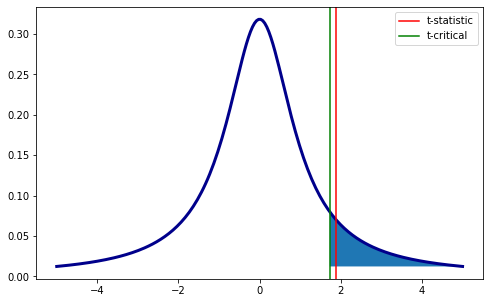

In [69]:
# Generate points on x-axis
xs = np.linspace(-5,5, 200)
# Get pdf
ys = stats.t.pdf(xs, df = 1, loc = 0, scale = 1)
# Initialise figure
fig = plt.figure(figsize = (8,5))
# Get axis from figure
ax = fig.gca()
# Plot pdf
ax.plot(xs, ys, linewidth=3, color='darkblue')
# Plot t
ax.axvline(abs(t_value), color = 'red', label = 't-statistic')
# Plot t-critical
ax.axvline(t_crit, color = 'green', label = 't-critical')
# Fill tail
ax.fill_betweenx(ys, xs, t_crit, where = xs > t_crit)
# Display plot
plt.legend()
plt.show()

### Confidence Intervals

In [8]:
# Generate random samples
# 500 data points, mean is 54 and std deviation is 17
samples = np.random.normal(54, 17, size=500)
samples[:10]

array([39.64717513, 69.5487887 , 67.92548515, 79.66282528, 22.6280807 ,
       50.62287869, 40.58260873, 41.34962454, 37.6845539 , 62.68177945])

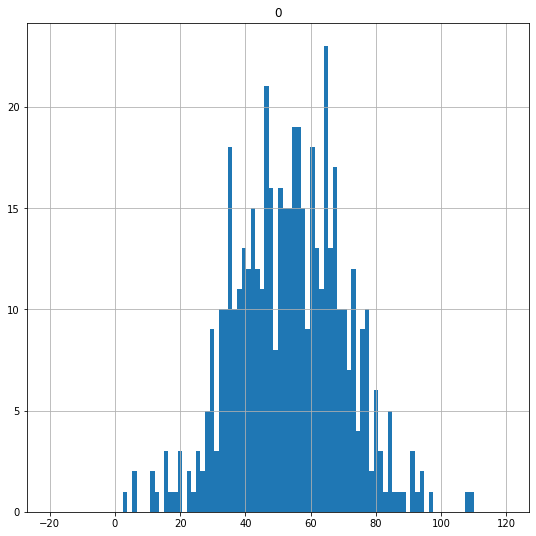

In [30]:
df = pd.DataFrame(samples)
df.hist(bins=100,range=(-20,120),figsize=(9,9))
plt.show()

In [12]:
#Min and Max of Confidence Interval
min_ci, max_ci = stats.t.interval(alpha = 0.95,          
                                  df = len(samples)-1,    
                                  loc = samples.mean(),
                                  scale = samples.std())
min_ci, max_ci

(20.163272588254365, 87.76747335822995)

## Welch's t-test

More accurate than Student's t-test when samples are of different size and different variance.

The t-value (t-statistic):

$ \Large t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$ where

$\bar{X_i}$ - mean of sample i
$s_i$ - variance of sample i
$N_i$ - sample size of sample i

Degrees of freedom:

$ \Large v \approx \frac{\left( \frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}\right)^2}{\frac{s_1^4}{N_1^2v_1} + \frac{s_2^4}{N_2^2v_2}} $

### Python code

`scipy.stats.ttest_ind(a, b, axis=0, equal_var=False, nan_policy='propagate')`

Same as for Student's t-test, but set `equal_var` to be `False` does Welch's t-test instead.

### Examples

In [79]:
# Define rvs with different size, mean and variance
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=8, scale=20, size=100)

# t-test with equal_var = False
stats.ttest_ind(rvs1, rvs2, equal_var = False)

Ttest_indResult(statistic=-2.4344520256063737, pvalue=0.01653181791764459)

### Alternative using functions

In [31]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

In [32]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

In [33]:
def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [80]:
#Example
p_value_welch_ttest(rvs1, rvs2, two_sided = True)

0.016531817917644576

## ANOVA

ANOVA (Analysis of Variance) - method for generalising statistic tests to multiple groups. Way of testing multiple features at once.

To generate ANOVA table, first fit a linear model, then obtain the table from this object.

Two category ANOVA is identical to 2-tailed t-test.

### Python code

```Control_Column ~ C(factor_col1) + factor_col2 + C(factor_col3) + ... + X```

_We indicate categorical variables by wrapping them with ```C() ```._ 

### Examples

In [3]:
df = pd.read_csv('IT_salaries.csv')
df.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


This particular table is of salaries in IT and has 4 columns:

S - the individuals salary

X - years of experience

E - education level (1-Bachelors, 2-Masters, 3-PHD)

M - management (0-no management, 1-yes management)

In [4]:
formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq    df           F        PR(>F)
C(E)      9.152624e+07   2.0   43.351589  7.672450e-11
C(M)      5.075724e+08   1.0  480.825394  2.901444e-24
X         3.380979e+08   1.0  320.281524  5.546313e-21
Residual  4.328072e+07  41.0         NaN           NaN


As small p-values, can conclude that experience, education and management all have a significant influence on salary.

## Kolmogorov-Smirnov Test

Way of comparing two distributions, or a sample distribution with a theoretical distribution (most often the normal distribution).

The distributions are compared in cumulative form as **empirical cumulative distribution functions**.

If X is a random variable with CDF 

$$ F(X) = P(X \leq x) $$

One-sample K-S Test or 'goodness of fit' test:

$$ d = max (abs (F_0(X) - F_r(X)) $$

$$ F_0(X) = \frac{\# obs \leq X}{\# obs}; F_r(X) = theoretical frequency $$

If statistic is less than critical value, cannot reject H0. 

If statistic is greater than critical value, reject H0.

### Python code

`scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')`

Perform the Kolmogorov-Smirnov test for goodness of fit.

This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). Under the null hypothesis the two distributions are identical, G(x)=F(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions.

*Returns*	
D (float): KS test statistic, either D, D+ or D-.

p-value (float): One-tailed or two-tailed p-value.

### Examples

## Type 1 and type 2 errors

**Type 1 error** is a false positive. When you reject H0 when it should not have been rejected.

**Type 2 error** is a false negative. When you fail to reject H0 even though it is false.

Reducing type 1 errors leads to an increase in type 2 errors and vice versa, so important to choose alpha and beta carefully.

Typically, **alpha = 0.05** and **beta = 0.2**

## Effect size

If the effect was significant, how significant was it? 


Pooled Variance:

$$ \sigma^2_{pooled} = \frac{\sigma^2_1 n_1 + \sigma^2_2 n_2}{n_1 + n_2}$$
**Cohen's d statistic**

$$ d = \frac{\mu_1 - \mu_2}{\sigma_{pooled}} $$

Pooled variance is the standardiser, average spread of data points around their group's mean.

d is a way to represent the magnitude of difference between two groups. d is dimensionless.


Rule of Thumb:

**Small effect** = 0.2

**Medium Effect** = 0.5

**Large Effect** = 0.8

## Power

Statistical Power: How good is our test; essentially how many Type 2 errors

$$power = 1 - \beta$$

Power ranges from 0 to 1, a test with power = 1 perfectly rejects H0 when it is false.

Adding more sample sizes when p-value is close can lead to artificially rejecting H0 when we shouldn't. As a solution, do a power calculation to determine optimal sample size for given alpha, power and effect size.

*Determine the probability of detecting an effect of a given size, with a given level of confidence (alpha) and under sample size constraints*

Usually acceptable power is **0.8**.

### Python code

`TTestPower.solve_power(effect_size=None, nobs=None, alpha=None, power=None, alternative='two-sided')`

Solve for any one parameter of the power of a one sample t-test
Exactly one needs to be None, all others need numeric values.

This test can also be used for a paired t-test, where effect size is defined in terms of the mean difference, and nobs is the number of pairs.

`alternative` str: ‘two-sided’ (default) or ‘one-sided’

### Examples

In [75]:
# Calculate sample size required
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=.2, alpha=.05, power=.8)

393.4056989990335

In [76]:
# Calculate power
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=.2, nobs1=80, alpha=.05)

0.24175778678474177

### Visualisation

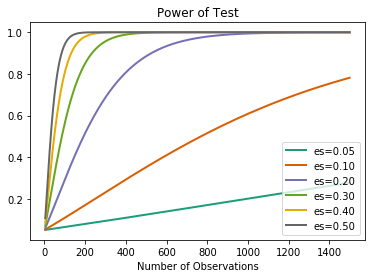

In [74]:
# Power plot for different effect sizes

power_analysis = TTestIndPower()

power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5]),
                          alpha=0.05)
plt.show()

## Additional Topics

### Resampling Methods

**Bootstrap** - take random samples with replacement from the original sample.

**Jackknife** - take samples by removing one or more observations at a taime. Each of these (n-1)-sized samples is aggregated to form a new sample.

**Permutation test** - instead of assuming the distribution, calculate all permutations of data and compute statistic.

### Bonferroni correction

If alpha = 0.05 and we are doing 10 comparisons, alpha should be set to 0.05/10 ie 0.005. The bonferroni correction adjusts alpha when doing multiple comparisons.

### Goodhart's law

*"Any observed statsitical regularity will collapse once pressure is placed upon it for control purposes"*

Or in other words, any measure which becomes a target ceases to be an effective measure.

E.g. Cobra skins bounty and standardised testing